In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#La matrice 
X = np.array([[495,776,423,759,1848,655,486],
              [518,995,548,893,2056,584,319],
              [561,1097,887,1167,2630,515,284],
              [414,660,367,638,1620,534,407],
              [400,699,484,762,1856,460,416],
              [304,789,621,1149,2366,385,282],
              [324,563,341,544,1507,406,407],
              [319,608,396,568,1501,386,363],
              [243,843,689,1148,2345,438,341],
              [247,428,354,526,1437,332,427],
              [239,559,388,567,1527,293,258],
              [235,767,562,927,1948,372,433]])

In [3]:
#Affichage matrice de corrélation 
R = np.corrcoef(X, rowvar=False)
print(R)

[[ 1.          0.66279874  0.33218856  0.23248901  0.37459064  0.8555748
   0.0068796 ]
 [ 0.66279874  1.          0.85625022  0.82730007  0.88108065  0.59311021
  -0.35646825]
 [ 0.33218856  0.85625022  1.          0.9263958   0.95947671  0.19613878
  -0.48628058]
 [ 0.23248901  0.82730007  0.9263958   1.          0.98168805  0.24681402
  -0.40185403]
 [ 0.37459064  0.88108065  0.95947671  0.98168805  1.          0.32126911
  -0.43723528]
 [ 0.8555748   0.59311021  0.19613878  0.24681402  0.32126911  1.
   0.30376123]
 [ 0.0068796  -0.35646825 -0.48628058 -0.40185403 -0.43723528  0.30376123
   1.        ]]


In [4]:

# les valeurs propres 
eigenvalues, eigenvectors = np.linalg.eig(R)

# Trier les valeurs propres en ordre décroissant
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Calculer le taux d'inertie projeté sur chaque axe principal
taux_inertie = eigenvalues / np.sum(eigenvalues)

# Calculer les taux cumulés de l'information retenue
taux_cum = np.cumsum(taux_inertie)

# Afficher dans une matrice les infos globales 
globale = np.column_stack((eigenvalues, taux_inertie, taux_cum))
print("la matrice globale:\n",globale)

la matrice globale:
 [[4.33370137e+00 6.19100195e-01 6.19100195e-01]
 [1.83102888e+00 2.61575554e-01 8.80675749e-01]
 [6.30082937e-01 9.00118481e-02 9.70687597e-01]
 [1.28063246e-01 1.82947495e-02 9.88982347e-01]
 [5.72966957e-02 8.18524225e-03 9.97167589e-01]
 [1.87433259e-02 2.67761799e-03 9.99845207e-01]
 [1.08355266e-03 1.54793236e-04 1.00000000e+00]]


In [5]:
#les coordonnées de tous les individus sur tous les axes principaux
# centrer-réduire les données
Cen = X - np.mean(X, axis=0)
Z = Cen / np.std(Cen, axis=0)

# décomposition en valeurs singulières
U, s, Vt = np.linalg.svd(Z)

# coordonnées des individus sur les axes principaux
ind_coords = np.dot(Z, Vt.T)

# afficher les coordonnées des individus
print("Coordonnées de tous les individus sur tous les axes principaux :")
print(ind_coords)

Coordonnées de tous les individus sur tous les axes principaux :
[[-2.27912176e-01 -2.90090939e+00 -5.91650911e-01 -2.56495918e-01
   1.28590570e-01 -6.58453082e-02 -2.38048825e-02]
 [-2.03662775e+00 -1.18297214e+00  1.03376042e+00 -3.38331209e-01
  -3.40918000e-01  1.30442858e-01  3.25739878e-03]
 [-4.51185211e+00  1.03286261e-01  5.92700016e-01  7.52362498e-01
   7.92902930e-02 -9.97586015e-02 -1.96372217e-03]
 [ 9.77431323e-01 -1.43350373e+00  2.89904653e-01 -2.73158489e-01
   9.76897708e-02 -7.13697433e-02  5.22324129e-02]
 [ 2.65447523e-01 -6.61258672e-01 -2.84388314e-01  3.01416089e-01
   1.66141511e-01  1.12955756e-01 -1.57963338e-02]
 [-1.67304741e+00  1.81323680e+00 -1.01947410e-01 -4.16810099e-01
   4.40487494e-01  2.32913305e-01  1.66146215e-02]
 [ 2.13483400e+00 -3.38428300e-01  1.13416285e-01  1.10466618e-01
   9.90836018e-03  7.07783784e-02 -6.86584643e-02]
 [ 1.75427032e+00  1.77184437e-01  5.23213474e-01  1.53063946e-01
  -1.76993919e-01 -4.44849514e-02  5.15344675e-02]

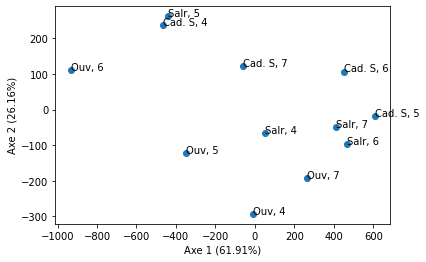

In [7]:
#la quatrieme question : Visualiser graphiquement tous les individus dans le plan principal

# Projection des individus sur les deux premiers axes
coord_indiv = Cen.dot(eigenvectors[:, :2])

# Création du graphique
fig, ax = plt.subplots()

# Affichage des individus
ax.scatter(coord_indiv[:, 0], coord_indiv[:, 1])

# Affichage des noms d'individus
for i, txt in enumerate(['Ouv, 4', 'Ouv, 5', 'Ouv, 6', 'Ouv, 7',
                         'Salr, 4', 'Salr, 5', 'Salr, 6', 'Salr, 7',
                         'Cad. S, 4', 'Cad. S, 5', 'Cad. S, 6', 'Cad. S, 7']):
    ax.annotate(txt, (coord_indiv[i, 0], coord_indiv[i, 1]))

# Affichage du taux d'inertie sur chaque axe
ax.set_xlabel('Axe 1 ({:.2%})'.format(eigenvalues[0] / np.sum(eigenvalues)))
ax.set_ylabel('Axe 2 ({:.2%})'.format(eigenvalues[1] / np.sum(eigenvalues)))

plt.show()

In [8]:
#la question 5: Déterminer les coordonnées des variables sur tous les axes principaux.
# Calcul des coordonnées des variables sur tous les axes principaux
# Calcul de la matrice de corrélation
mat_corr = np.corrcoef(X)

# Calcul des valeurs propres et vecteurs propres
valeurs_propres, vecteurs_propres = np.linalg.eig(mat_corr)

# Calcul des coordonnées des variables sur tous les axes principaux
X_centré_reduit = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
coord_vars = np.dot(X_centré_reduit.T, vecteurs_propres)
print("Coordonnées des variables sur les axes principaux :")
for i in range(len(valeurs_propres)):
    print(f"Axe principal {i+1} : {coord_vars[:,i]}")


Coordonnées des variables sur les axes principaux :
Axe principal 1 : [0.00551039+0.j 0.00854879+0.j 0.00948276+0.j 0.00994565+0.j
 0.01017361+0.j 0.00719473+0.j 0.00147131+0.j]
Axe principal 2 : [-0.31155278+0.j  2.21945277+0.j  2.99620475+0.j  3.00299073+0.j
  2.87172056+0.j -0.66114657+0.j -2.26514574+0.j]
Axe principal 3 : [-2.92513037+0.j -2.26372516+0.j -0.815616  +0.j -0.66933262+0.j
 -1.0337541 +0.j -2.60197547+0.j  0.9145015 +0.j]
Axe principal 4 : [-0.23583027+0.j  0.40678275+0.j -0.16470582+0.j  1.04470115+0.j
  0.63348339+0.j  1.38151742+0.j  1.37599798+0.j]
Axe principal 5 : [-0.97648136+0.j -0.1919525 +0.j -0.72253283+0.j -0.76946789+0.j
 -1.04209806+0.j -0.57950889+0.j  0.48846408+0.j]
Axe principal 6 : [-0.26530375+0.j  0.05839845+0.j  0.32672058+0.j  0.02319099+0.j
  0.059322  +0.j  0.36153675+0.j -0.1124533 +0.j]
Axe principal 7 : [-0.40995526+0.j -0.45916749+0.j -0.37420731+0.j -0.2523881 +0.j
 -0.25683342+0.j -0.48629312+0.j -0.39347908+0.j]
Axe principal 8 : [-0.53

In [9]:
# question six : Afficher un tableau résumant les corrélations entre les variables et les axes principaux
# Créer le dataframe à partir de la matrice X
df = pd.DataFrame(X, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7'])

# Calculer la matrice de corrélation
corr_matrix = np.corrcoef(X, rowvar=False)

# Créer un tableau résumant les corrélations entre les variables et les axes principaux
summary_table = pd.DataFrame(corr_matrix[:7,:], columns=['Axe 1', 'Axe 2', 'Axe 3', 'Axe 4', 'Axe 5', 'Axe 6', 'Axe 7'])
summary_table.index = df.columns

# Afficher le tableau
print(summary_table)

       Axe 1     Axe 2     Axe 3     Axe 4     Axe 5     Axe 6     Axe 7
V1  1.000000  0.662799  0.332189  0.232489  0.374591  0.855575  0.006880
V2  0.662799  1.000000  0.856250  0.827300  0.881081  0.593110 -0.356468
V3  0.332189  0.856250  1.000000  0.926396  0.959477  0.196139 -0.486281
V4  0.232489  0.827300  0.926396  1.000000  0.981688  0.246814 -0.401854
V5  0.374591  0.881081  0.959477  0.981688  1.000000  0.321269 -0.437235
V6  0.855575  0.593110  0.196139  0.246814  0.321269  1.000000  0.303761
V7  0.006880 -0.356468 -0.486281 -0.401854 -0.437235  0.303761  1.000000


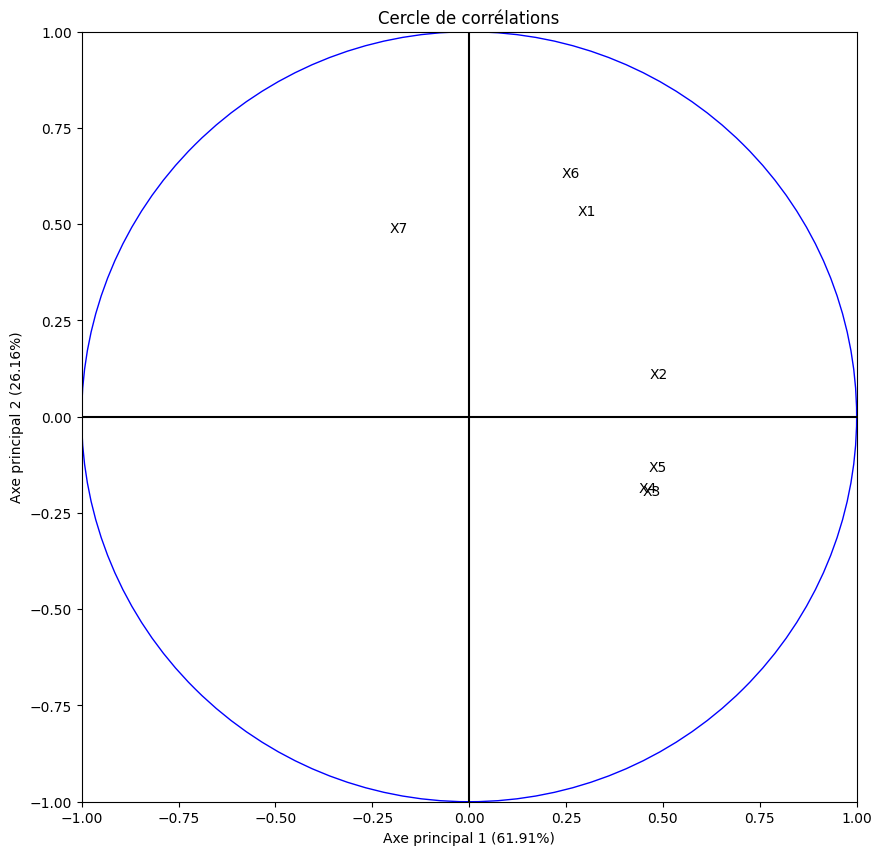

In [ ]:
# question sept: Visualiser graphiquement toutes les variables dans le plan principal 
import numpy as np
import matplotlib.pyplot as plt

# Définition des variables
var_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']

# Définition des axes principaux
eig_vals, eig_vecs = np.linalg.eig(corr_matrix)
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]
tot = sum(eig_vals)
var_exp = [(i / tot) * 100 for i in eig_vals]
cum_var_exp = np.cumsum(var_exp)

# Visualisation des variables dans le plan principal
fig, ax = plt.subplots(figsize=(10, 10))
for i, var_name in enumerate(var_names):
    ax.annotate(var_name, (eig_vecs[i, 0], eig_vecs[i, 1]))
ax.set_xlabel("Axe principal 1 (%.2f%%)" % var_exp[0])
ax.set_ylabel("Axe principal 2 (%.2f%%)" % var_exp[1])
ax.set_title("Cercle de corrélations")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
ax.add_artist(circle)
plt.show()


In [ ]:
#la question huite : Interpréter les graphes obtenus. Analyser bien le nuage des variables

In [13]:
#question neuf :Calcul de la qualité de représentation de chaque individu sur chaque axe principal 
# Calcul des coordonnées des individus sur les axes principaux
indiv_coord = np.dot(Cen, eigenvectors[:, :2])

# Calcul de la somme des carrés des coordonnées de chaque individu sur tous les axes
indiv_sum_square_coord = np.sum(np.square(indiv_coord), axis=1)

# Calcul de la qualité de représentation de chaque individu sur chaque axe principal
indiv_rep_qual = np.square(indiv_coord) / indiv_sum_square_coord[:, np.newaxis]
print(indiv_rep_qual)

[[1.24297403e-03 9.98757026e-01]
 [8.91533408e-01 1.08466592e-01]
 [9.86179439e-01 1.38205605e-02]
 [6.48255167e-01 3.51744833e-01]
 [3.81480378e-01 6.18519622e-01]
 [7.37375244e-01 2.62624756e-01]
 [9.59010824e-01 4.09891760e-02]
 [9.85504245e-01 1.44957545e-02]
 [7.94257352e-01 2.05742648e-01]
 [9.99169216e-01 8.30783773e-04]
 [9.46943600e-01 5.30564000e-02]
 [1.87523344e-01 8.12476656e-01]]


In [ ]:
#question dix : Calculer la contribution de chaque individu à l’inertie de chaque axe principal
# Projection des individus sur les axes principaux
proj_indiv =Z.dot(eigenvectors)

# Calcul de la contribution de chaque individu à l'inertie de chaque axe principal
contrib_indiv = (proj_indiv ** 2) / (Z.shape[0] * eigenvalues)

# Affichage des contributions dans un tableau
print("Contributions des individus à l'inertie de chaque axe principal :")
print(pd.DataFrame(contrib_indiv, index=np.arange(1, Z.shape[0]+1),
                   columns=["Axe " + str(i+1) for i in range(Z.shape[1])]))

Contributions des individus à l'inertie de chaque axe principal :
       Axe 1     Axe 2     Axe 3     Axe 4     Axe 5     Axe 6     Axe 7
1   0.000999  0.382994  0.046297  0.042811  0.024050  0.019276  0.043581
2   0.079760  0.063690  0.141339  0.074487  0.169040  0.075651  0.000816
3   0.391444  0.000486  0.046461  0.368340  0.009144  0.044246  0.000297
4   0.018371  0.093524  0.011116  0.048554  0.013880  0.022646  0.209821
5   0.001355  0.019901  0.010697  0.059119  0.040146  0.056727  0.019190
6   0.053824  0.149635  0.001375  0.113050  0.282200  0.241191  0.021230
7   0.087637  0.005213  0.001701  0.007941  0.000143  0.022273  0.362541
8   0.059177  0.001429  0.036206  0.015245  0.045562  0.008798  0.204251
9   0.060296  0.091152  0.142837  0.131928  0.008132  0.347940  0.015638
10  0.171799  0.006552  0.023198  0.094021  0.079205  0.021220  0.036866
11  0.075045  0.159279  0.247326  0.017747  0.013877  0.026220  0.077106
12  0.000294  0.026148  0.291449  0.026759  0.314622  0.11

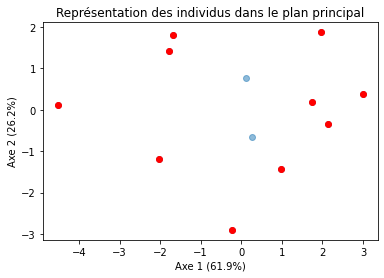

In [16]:
# question onze : Marquer graphiquement tous les individus ayant une très bonne qualité de représentation
# Calcul des coordonnées des individus dans le plan principal
coord_indiv = np.dot(Z, eigenvectors[:, :2])

# Calcul des carrés des distances aux origines pour chaque individu
dists = np.sum(coord_indiv**2, axis=1)

# Détermination d'un seuil pour la qualité de représentation
seuil = 3.0

# Identification des individus ayant une très bonne qualité de représentation
indiv_bons = np.where(dists >= seuil)[0]

# Affichage du nuage de points avec mise en évidence des individus ayant une très bonne qualité de représentation
plt.scatter(coord_indiv[:,0], coord_indiv[:,1], alpha=0.5)
plt.scatter(coord_indiv[indiv_bons,0], coord_indiv[indiv_bons,1], color='red')
plt.xlabel('Axe 1 ({:.1f}%)'.format(eigenvalues[0]/np.sum(eigenvalues)*100))
plt.ylabel('Axe 2 ({:.1f}%)'.format(eigenvalues[1]/np.sum(eigenvalues)*100))
plt.title('Représentation des individus dans le plan principal')
plt.show()
